In [1]:
import csv
import random
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import networkx as nx
from collections import Counter

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
train_data = pd.read_csv('train.csv')
train_data.head()

,source_node,destination_node
0,1,690569
1,1,315892
2,1,189226
3,2,834328
4,2,1615927


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9437519 entries, 0 to 9437518
Data columns (total 2 columns):
 #   Column            Dtype
---  ------            -----
 0   source_node       int64
 1   destination_node  int64
dtypes: int64(2)
memory usage: 144.0 MB


In [4]:
train_data.isnull().sum()

,0
source_node,0
destination_node,0


In [5]:
%%time
train_data.to_csv('train_without_header.csv', header=False, index=False)

CPU times: user 5.08 s, sys: 231 ms, total: 5.31 s
Wall time: 5.32 s


In [6]:
del train_data

In [7]:
%%time
# constructing graph using the edges present in the train data
graph = nx.read_edgelist(
    path='train_without_header.csv',
    delimiter=',',
    create_using=nx.DiGraph(),
    nodetype=int
)

CPU times: user 1min 13s, sys: 11.7 s, total: 1min 25s
Wall time: 1min 25s


In [8]:
# Print basic information about the graph
print(f"Name: {graph.name}")
print(f"Type: {type(graph)}")
print(f"Number of nodes: {graph.number_of_nodes()}")
print(f"Number of edges: {graph.number_of_edges()}")

Name: 
Type: <class 'networkx.classes.digraph.DiGraph'>
Number of nodes: 1862220
Number of edges: 9437519


Name: 
Type: <class 'networkx.classes.digraph.DiGraph'>
Number of nodes: 122
Number of edges: 100


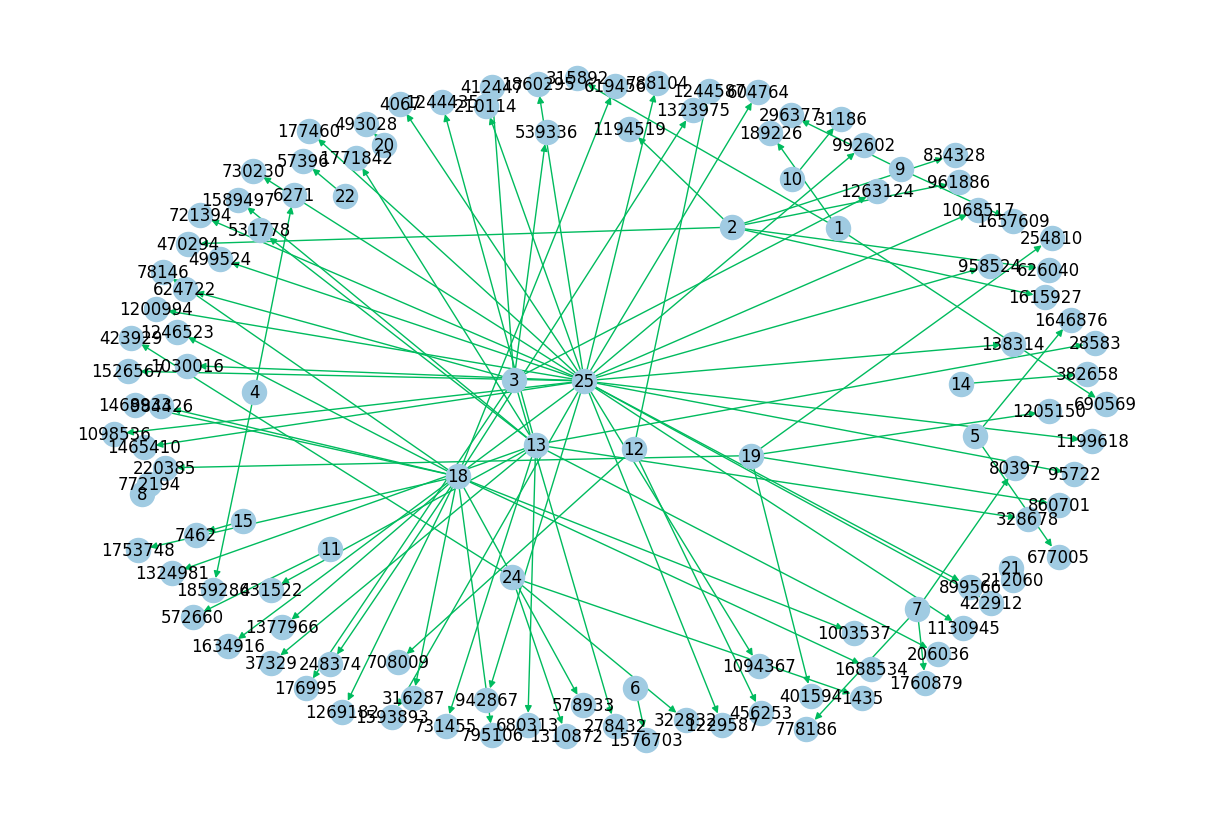

In [9]:
# displaying a subgraph

# reading the first 100 rows of the data and saving it
pd.read_csv('train.csv', nrows=100).to_csv('train_without_header_sample.csv', header=False, index=False)

subgraph = nx.read_edgelist(
    'train_without_header_sample.csv',
    delimiter=',',
    create_using=nx.DiGraph(),
    nodetype=int
)
print(f"Name: {subgraph.name}")
print(f"Type: {type(subgraph)}")
print(f"Number of nodes: {subgraph.number_of_nodes()}")
print(f"Number of edges: {subgraph.number_of_edges()}")

pos = nx.spring_layout(subgraph)

plt.figure(figsize=(12, 8))
nx.draw(subgraph, pos, node_color='#A0CBE2', edge_color='#00bb5e', width=1, edge_cmap=plt.cm.Blues, with_labels=True)
plt.show()

In [10]:
# Number of unique persons in the graph
print(f"The number of unique persons: {len(graph.nodes())}")

The number of unique persons: 1862220


### Number of followers for each person

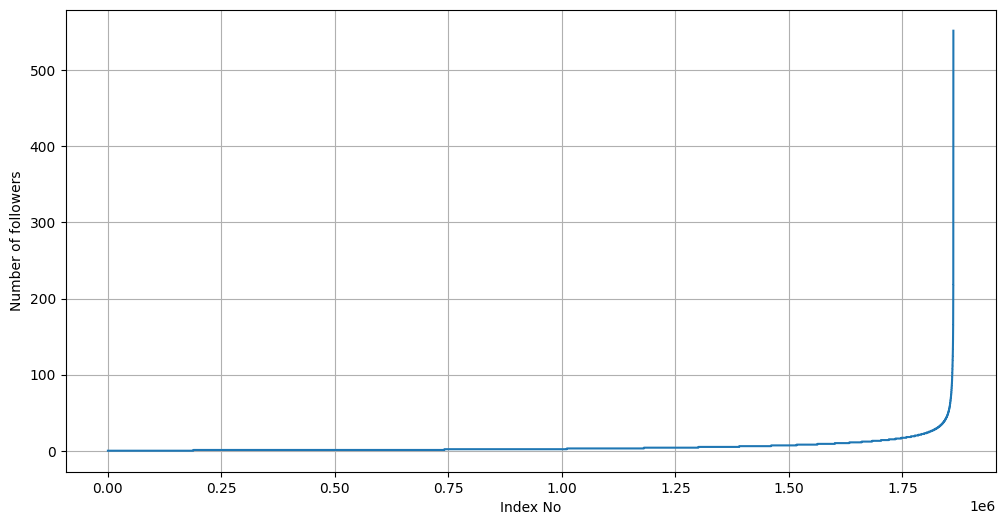

In [11]:
indegree_dist = list(dict(graph.in_degree()).values())
indegree_dist.sort()

plt.figure(figsize=(12, 6))
plt.grid()
plt.plot(indegree_dist)
plt.xlabel('Index No')
plt.ylabel('Number of followers')
plt.show()

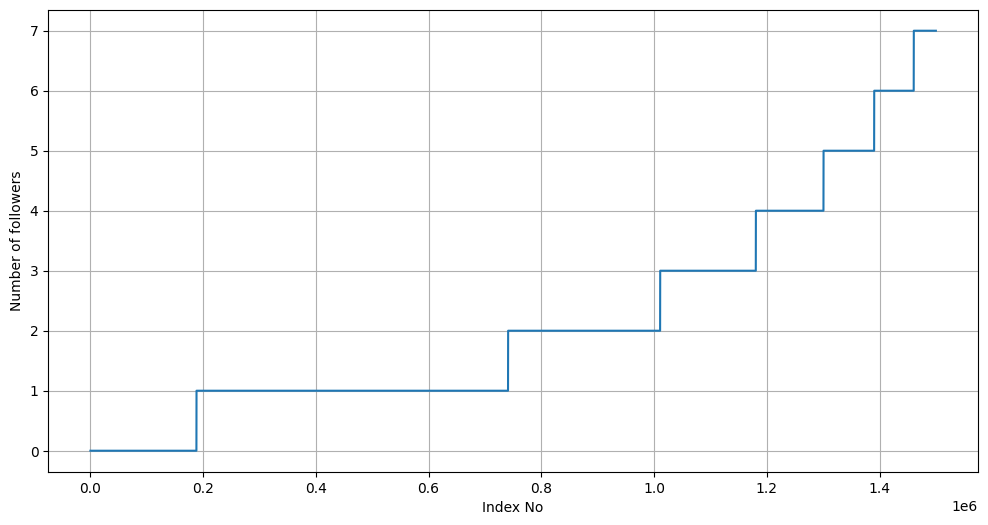

In [12]:
plt.figure(figsize=(12, 6))
plt.grid()
plt.plot(indegree_dist[0:1500000])
plt.xlabel('Index No')
plt.ylabel('Number of followers')
plt.show()

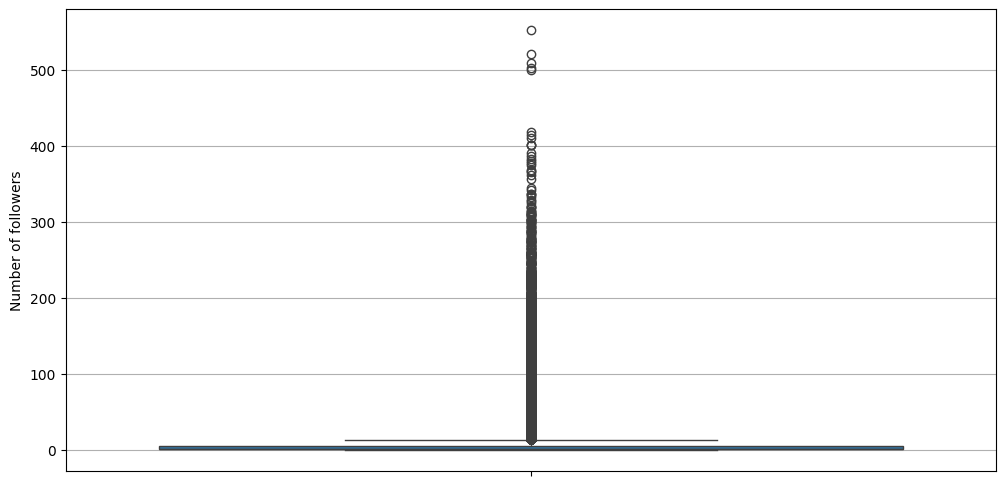

In [13]:
plt.figure(figsize=(12, 6))
plt.grid()
sns.boxplot(indegree_dist)
plt.ylabel('Number of followers')
plt.show()

In [14]:
# 90-100 percentile
for index in range(11):
  percentile = 90+index
  print(f"{percentile} percentile value is {np.percentile(indegree_dist, percentile)}")

90 percentile value is 12.0
91 percentile value is 13.0
92 percentile value is 14.0
93 percentile value is 15.0
94 percentile value is 17.0
95 percentile value is 19.0
96 percentile value is 21.0
97 percentile value is 24.0
98 percentile value is 29.0
99 percentile value is 40.0
100 percentile value is 552.0


In [15]:
# 99-100 percentile
for index in range(1, 11):
  percentile = 99+(index/10)
  print(f"{percentile} percentile value is {np.percentile(indegree_dist, percentile)}")

99.1 percentile value is 42.0
99.2 percentile value is 44.0
99.3 percentile value is 47.0
99.4 percentile value is 50.0
99.5 percentile value is 55.0
99.6 percentile value is 61.0
99.7 percentile value is 70.0
99.8 percentile value is 84.0
99.9 percentile value is 112.0
100.0 percentile value is 552.0


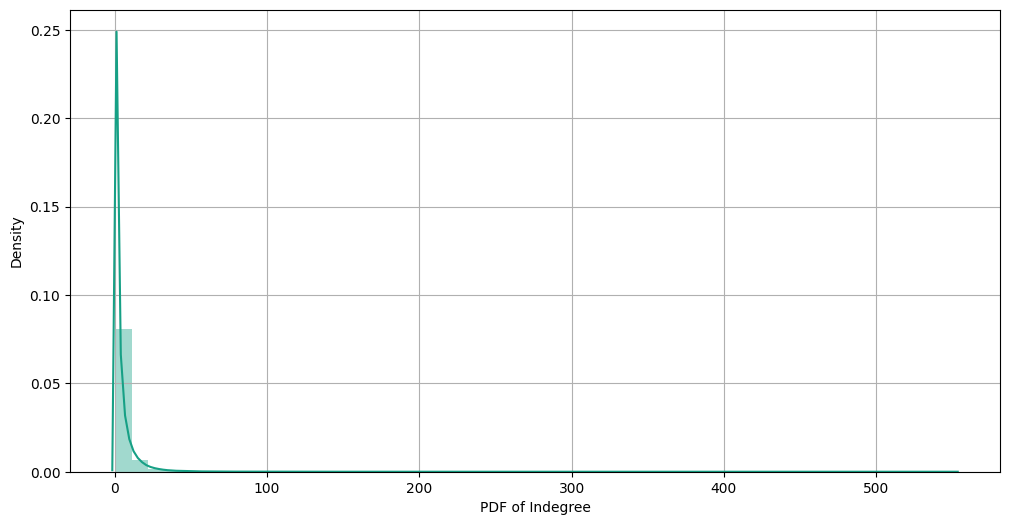

In [16]:
plt.figure(figsize=(12, 6))
plt.grid()
sns.distplot(indegree_dist, color='#16A085')
plt.xlabel('PDF of Indegree')
plt.show()

### Number of people each person is following

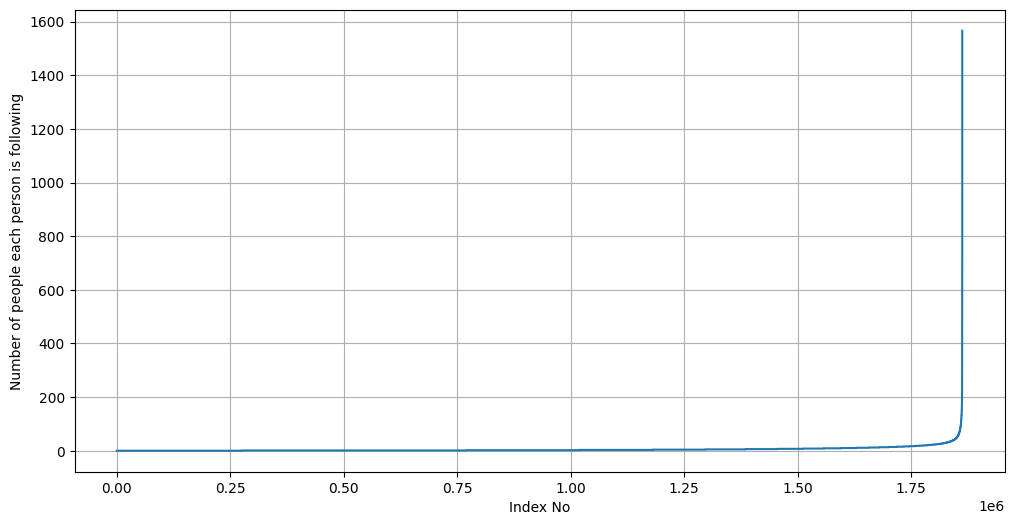

In [17]:
outdegree_dist = list(dict(graph.out_degree()).values())
outdegree_dist.sort()

plt.figure(figsize=(12, 6))
plt.plot(outdegree_dist)
plt.xlabel('Index No')
plt.ylabel('Number of people each person is following')
plt.grid()
plt.show()

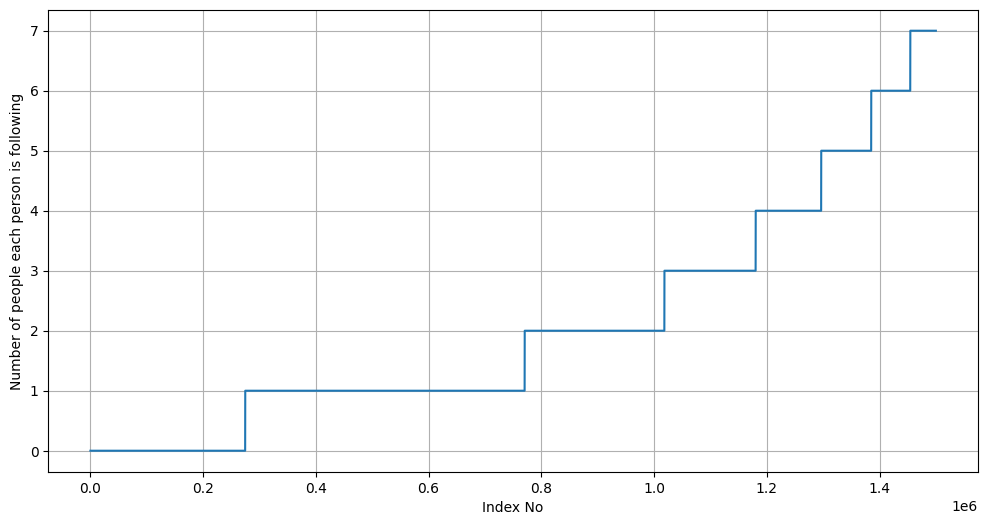

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(outdegree_dist[0:1500000])
plt.xlabel('Index No')
plt.ylabel('Number of people each person is following')
plt.grid()
plt.show()

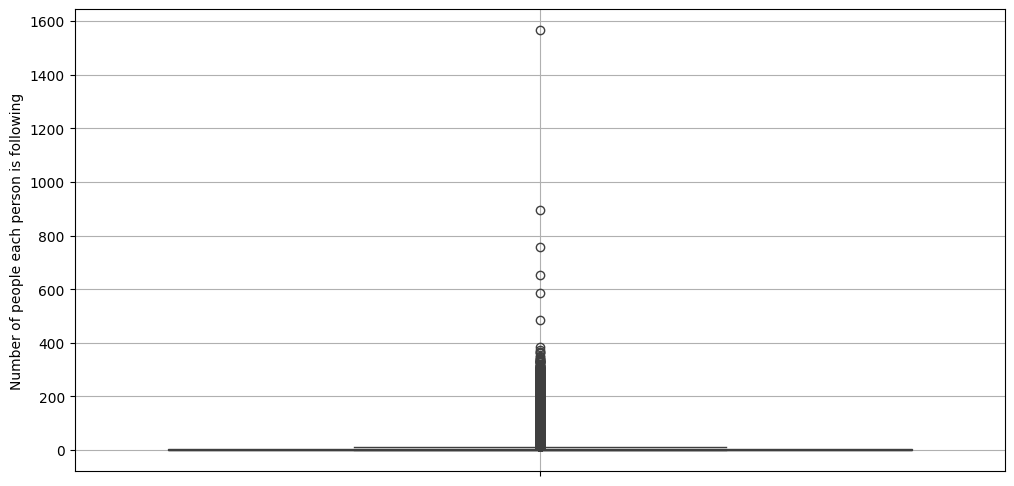

In [19]:
plt.figure(figsize=(12, 6))
sns.boxplot(outdegree_dist)
plt.ylabel('Number of people each person is following')
plt.grid()
plt.show()

In [20]:
# 90-100 percentile
for index in range(11):
  percentile = 90+index
  print(f"{percentile} percentile value is {np.percentile(outdegree_dist, percentile)}")

90 percentile value is 12.0
91 percentile value is 13.0
92 percentile value is 14.0
93 percentile value is 15.0
94 percentile value is 17.0
95 percentile value is 19.0
96 percentile value is 21.0
97 percentile value is 24.0
98 percentile value is 29.0
99 percentile value is 40.0
100 percentile value is 1566.0


In [21]:
# 99-100 percentile
for index in range(1, 11):
  percentile = 99+(index/10)
  print(f"{percentile} percentile value is {np.percentile(outdegree_dist, percentile)}")

99.1 percentile value is 42.0
99.2 percentile value is 45.0
99.3 percentile value is 48.0
99.4 percentile value is 52.0
99.5 percentile value is 56.0
99.6 percentile value is 63.0
99.7 percentile value is 73.0
99.8 percentile value is 90.0
99.9 percentile value is 123.0
100.0 percentile value is 1566.0


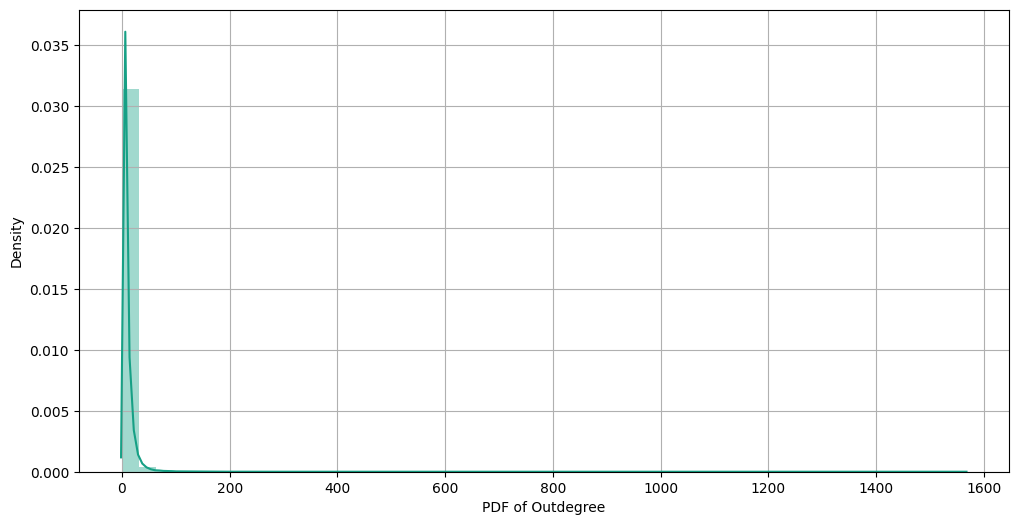

In [22]:
plt.figure(figsize=(12, 6))
plt.grid()
sns.distplot(outdegree_dist, color='#16A085')
plt.xlabel('PDF of Outdegree')
plt.show()

In [23]:
print(f"Number of persons who are not following anyone: {sum(np.array(outdegree_dist) == 0)} ~ {round(sum(np.array(outdegree_dist) == 0)/len(outdegree_dist)*100)}%")

Number of persons who are not following anyone: 274512 ~ 15%


In [24]:
print(f"Number of persons who have zero followers: {sum(np.array(indegree_dist) == 0)} ~ {round(sum(np.array(indegree_dist) == 0)/len(indegree_dist)*100)}%")

Number of persons who have zero followers: 188043 ~ 10%


In [25]:
%%time
count = 0
for node in graph.nodes():
  if len(list(graph.predecessors(node))) == 0:
    if len(list(graph.successors(node))) == 0:
      count += 1
print(f"Number of persons who are not following anyone and have zero followers: {count}")

Number of persons who are not following anyone and have zero followers: 0
CPU times: user 3.59 s, sys: 7.52 ms, total: 3.6 s
Wall time: 3.64 s


### Both Followers + Following

In [26]:
%%time
dict_in = dict(graph.in_degree())
dict_out = dict(graph.out_degree())
d = Counter(dict_in) + Counter(dict_out)
in_out_degree = np.array(list(d.values()))
in_out_degree_sort = sorted(in_out_degree)

CPU times: user 4.34 s, sys: 1.74 s, total: 6.08 s
Wall time: 6.06 s


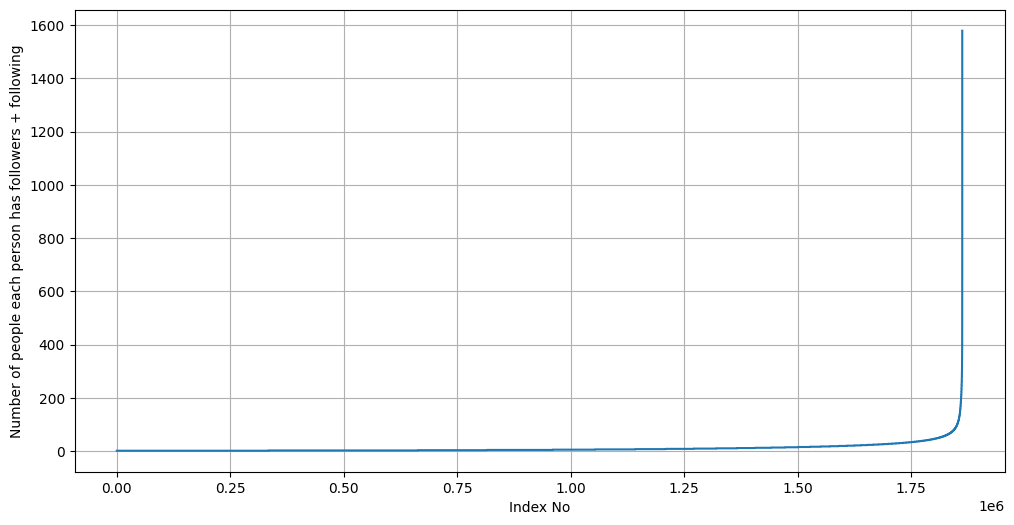

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(in_out_degree_sort)
plt.xlabel('Index No')
plt.ylabel('Number of people each person has followers + following')
plt.grid()
plt.show()

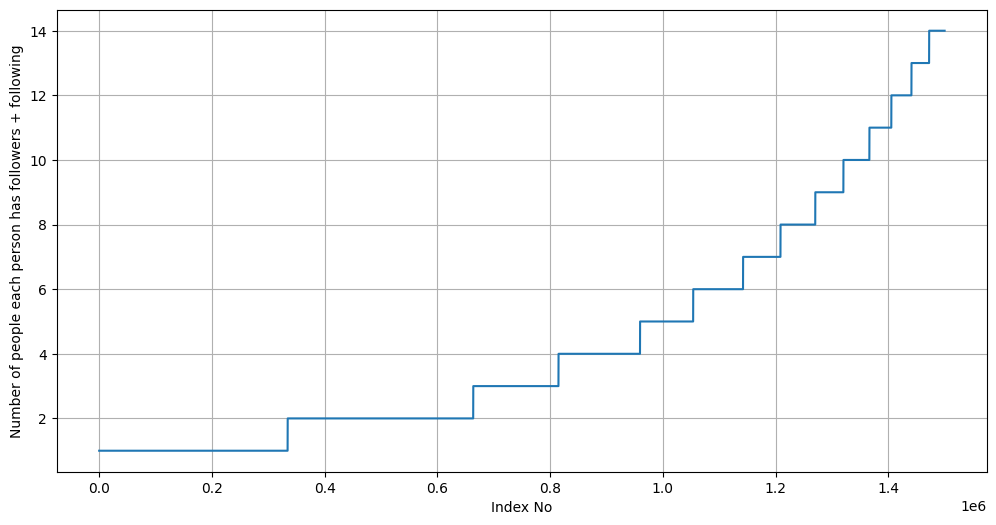

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(in_out_degree_sort[0:1500000])
plt.xlabel('Index No')
plt.ylabel('Number of people each person has followers + following')
plt.grid()
plt.show()

In [29]:
# 90-100 percentile
for index in range(11):
  percentile = 90+index
  print(f"{percentile} percentile value is {np.percentile(in_out_degree_sort, percentile)}")

90 percentile value is 24.0
91 percentile value is 26.0
92 percentile value is 28.0
93 percentile value is 31.0
94 percentile value is 33.0
95 percentile value is 37.0
96 percentile value is 41.0
97 percentile value is 48.0
98 percentile value is 58.0
99 percentile value is 79.0
100 percentile value is 1579.0


In [30]:
# 99-100 percentile
for index in range(1, 11):
  percentile = 99+(index/10)
  print(f"{percentile} percentile value is {np.percentile(in_out_degree_sort, percentile)}")

99.1 percentile value is 83.0
99.2 percentile value is 87.0
99.3 percentile value is 93.0
99.4 percentile value is 99.0
99.5 percentile value is 108.0
99.6 percentile value is 120.0
99.7 percentile value is 138.0
99.8 percentile value is 168.0
99.9 percentile value is 221.0
100.0 percentile value is 1579.0


In [31]:
print(f"Minimun no. of followers + following: {in_out_degree.min()}")
print(f"No. of persons having minimum no. of followers + following: {np.sum(in_out_degree == in_out_degree.min())}")

Minimun no. of followers + following: 1
No. of persons having minimum no. of followers + following: 334291


In [32]:
print(f"Maximum no. of followers + following: {in_out_degree.max()}")
print(f"No. of persons having maximum no. of followers + following: {np.sum(in_out_degree == in_out_degree.max())}")

Maximum no. of followers + following: 1579
No. of persons having maximum no. of followers + following: 1


In [33]:
print(f"Number of persons having having followers + following less than 10 are: {np.sum(in_out_degree < 10)}")

Number of persons having having followers + following less than 10 are: 1320326


In [34]:
%%time
print(f"Number of weakly connected components: {len(list(nx.weakly_connected_components(graph)))}")

count = 0
for i in list(nx.weakly_connected_components(graph)):
  if len(i) == 2:
    count += 1
print(f"Weakly connected components of 2 nodes: {count}")

Number of weakly connected components: 45558
Weakly connected components of 2 nodes: 32195
CPU times: user 44.3 s, sys: 629 ms, total: 44.9 s
Wall time: 45 s


### Posing this problem as a Classification problem

In [35]:
%%time

# creating a missing edges set

graph = csv.reader(open("train_without_header.csv", "r"))

edges = dict()
for edge in graph:
  edges[(edge[0], edge[1])] = 1

missing_edges = set()
while len(missing_edges) < 9437519:
  a = random.randint(1, 1862220)
  b = random.randint(1, 1862220)
  tmp = edges.get((a, b), -1)
  if tmp == -1 and a != b:
    try:
      if nx.shortest_path_length(g, source=a, target=b) > 2:
        missing_edges.add((a, b))
      else:
        continue
    except:
      missing_edges.add((a, b))
  else:
    continue

pickle.dump(missing_edges, open('missing_edges_final.pkl', 'wb'))

CPU times: user 48.8 s, sys: 11.6 s, total: 1min
Wall time: 1min


In [36]:
len(missing_edges)

9437519

### Splitting the data into train and test

In [37]:
df_pos = pd.read_csv('train.csv')
df_neg = pd.DataFrame(list(missing_edges), columns=['source_node', 'destination_node'])

print("Number of nodes in the graph with edges", df_pos.shape[0])
print("Number of nodes in the graph without edges", df_neg.shape[0])

Number of nodes in the graph with edges 9437519
Number of nodes in the graph without edges 9437519


In [38]:
# Splitted data into 80-20

# positive links and negative links separately because we need positive training data only for creating graph and for feature generation
X_train_pos, X_test_pos, y_train_pos, y_test_pos = train_test_split(df_pos, np.ones(len(df_pos)), test_size=0.2, random_state=9)
X_train_neg, X_test_neg, y_train_neg, y_test_neg = train_test_split(df_neg, np.zeros(len(df_neg)), test_size=0.2, random_state=9)

print('=='*50)
print("Number of nodes in the train data graph with edges", X_train_pos.shape, y_train_pos.shape)
print("Number of nodes in the train data graph without edges", X_train_neg.shape, y_train_neg.shape)
print('=='*50)
print("Number of nodes in the test data graph with edges", X_test_pos.shape, y_test_pos.shape)
print("Number of nodes in the test data graph without edges", X_test_neg.shape, y_test_neg.shape)

Number of nodes in the train data graph with edges (7550015, 2) (7550015,)
Number of nodes in the train data graph without edges (7550015, 2) (7550015,)
Number of nodes in the test data graph with edges (1887504, 2) (1887504,)
Number of nodes in the test data graph without edges (1887504, 2) (1887504,)


In [39]:
# removing header and saving the train and test data
X_train_pos.to_csv('train_pos_after_eda.csv', header=False, index=False)
X_test_pos.to_csv('test_pos_after_eda.csv', header=False, index=False)
X_train_neg.to_csv('train_neg_after_eda.csv', header=False, index=False)
X_test_neg.to_csv('test_neg_after_eda.csv', header=False, index=False)

In [40]:
%%time
train_graph = nx.read_edgelist(
    'train_pos_after_eda.csv',
    delimiter=',',
    create_using=nx.DiGraph(),
    nodetype=int
)

test_graph = nx.read_edgelist(
    'test_pos_after_eda.csv',
    delimiter=',',
    create_using=nx.DiGraph(),
    nodetype=int
)

print(f"Name: {train_graph.name}")
print(f"Type: {type(train_graph)}")
print(f"Number of nodes: {train_graph.number_of_nodes()}")
print(f"Number of edges: {train_graph.number_of_edges()}")

print(f"Name: {test_graph.name}")
print(f"Type: {type(test_graph)}")
print(f"Number of nodes: {test_graph.number_of_nodes()}")
print(f"Number of edges: {test_graph.number_of_edges()}")

Name: 
Type: <class 'networkx.classes.digraph.DiGraph'>
Number of nodes: 1780722
Number of edges: 7550015
Name: 
Type: <class 'networkx.classes.digraph.DiGraph'>
Number of nodes: 1144623
Number of edges: 1887504
CPU times: user 2min 2s, sys: 1.83 s, total: 2min 4s
Wall time: 2min 4s


In [41]:
# finding the unique nodes in the both train and test graphs
train_nodes_pos = set(train_graph.nodes())
test_nodes_pos = set(test_graph.nodes())

trY_teY = len(train_nodes_pos.intersection(test_nodes_pos))
trY_teN = len(train_nodes_pos - test_nodes_pos)
teY_trN = len(test_nodes_pos - train_nodes_pos)

print('no of people common in train and test -- ',trY_teY)
print('no of people present in train but not present in test -- ',trY_teN)

print('no of people present in test but not present in train -- ',teY_trN)
print('% of people not there in Train but exist in Test in total Test data are {} %'.format(teY_trN/len(test_nodes_pos)*100))

no of people common in train and test --  1063125
no of people present in train but not present in test --  717597
no of people present in test but not present in train --  81498
% of people not there in Train but exist in Test in total Test data are 7.1200735962845405 %


In [43]:
#final train and test data sets
X_train_pos = pd.read_csv('train_pos_after_eda.csv', names=['source_node', 'destination_node'])
X_test_pos = pd.read_csv('test_pos_after_eda.csv', names=['source_node', 'destination_node'])
X_train_neg = pd.read_csv('train_neg_after_eda.csv', names=['source_node', 'destination_node'])
X_test_neg = pd.read_csv('test_neg_after_eda.csv', names=['source_node', 'destination_node'])

print('='*60)
print("Number of nodes in the train data graph with edges", X_train_pos.shape[0])
print("Number of nodes in the train data graph without edges", X_train_neg.shape[0])
print('='*60)
print("Number of nodes in the test data graph with edges", X_test_pos.shape[0])
print("Number of nodes in the test data graph without edges", X_test_neg.shape[0])

X_train = pd.concat([X_train_pos, X_train_neg], ignore_index=True)
y_train = np.concatenate((y_train_pos,y_train_neg))
X_test = pd.concat([X_test_pos, X_test_neg], ignore_index=True)
y_test = np.concatenate((y_test_pos,y_test_neg))

X_train.to_csv('train_after_eda.csv',header=False,index=False)
X_test.to_csv('test_after_eda.csv',header=False,index=False)
pd.DataFrame(y_train.astype(int)).to_csv('train_y.csv',header=False,index=False)
pd.DataFrame(y_test.astype(int)).to_csv('test_y.csv',header=False,index=False)

Number of nodes in the train data graph with edges 7550015
Number of nodes in the train data graph without edges 7550015
Number of nodes in the test data graph with edges 1887504
Number of nodes in the test data graph without edges 1887504


In [44]:
print("Data points in train data",X_train.shape)
print("Data points in test data",X_test.shape)
print("Shape of target variable in train",y_train.shape)
print("Shape of target variable in test", y_test.shape)

Data points in train data (15100030, 2)
Data points in test data (3775008, 2)
Shape of target variable in train (15100030,)
Shape of target variable in test (3775008,)
